# PHYS 150 DEMO

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slxuphys/tamu_phys_150/blob/master/lecture/demo.ipynb)

## Code Preparation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import random

## Game of Life
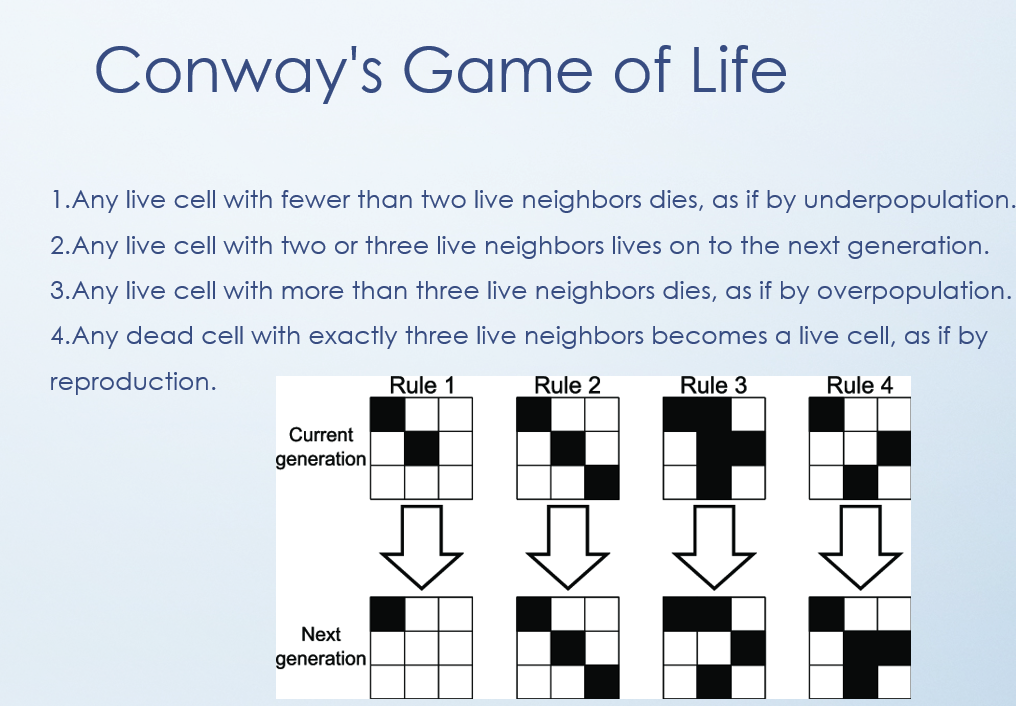

In [ ]:
dim=10 # size of the game
cell_bd=np.zeros((dim+2,dim+2),dtype=int)
#define neighbors
cell1=cell_bd[0:-2,1:-1]
cell2=cell_bd[2:,1:-1]
cell3=cell_bd[1:-1,0:-2]
cell4=cell_bd[1:-1,2:]
cell5=cell_bd[0:-2,0:-2]
cell6=cell_bd[2:,2:]
cell7=cell_bd[0:-2,2:]
cell8=cell_bd[2:,0:-2]
# draw the grid
fig, ax=plt.subplots(figsize=(8,8))
ax.set_xticks(np.arange(-.5, dim, 1));
ax.set_yticks(np.arange(-.5, dim, 1));
ax.set_xlim((-0.5,dim-.5))
ax.set_ylim((-0.5,dim-.5))
ax.axes.xaxis.set_ticklabels([]);
ax.axes.yaxis.set_ticklabels([]);
ax.grid()
ax.autoscale(enable=False)
plt.close()

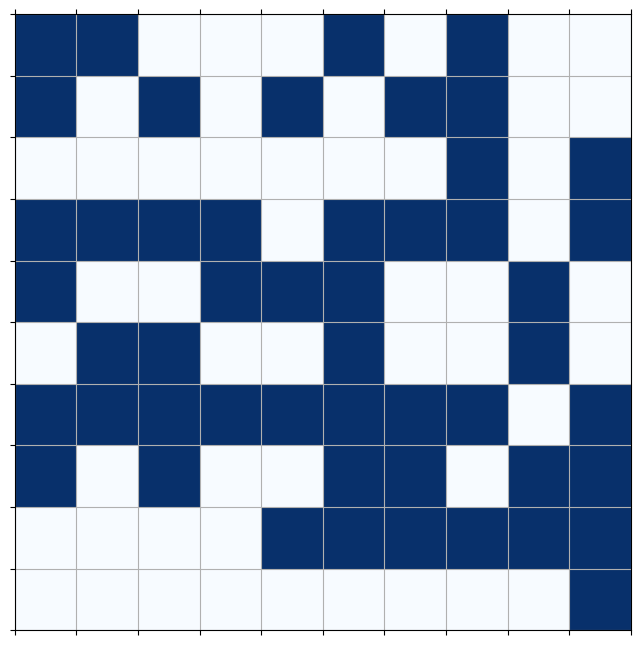

In [ ]:
cells=np.zeros(dim**2,dtype=int);
cells[:50]=1; #set the number of live cell
np.random.shuffle(cells) # shuffle their position randomly
cells=np.reshape(cells,(dim,dim))
cell_bd[1:-1,1:-1]=cells
cells=cell_bd[1:-1,1:-1]
h=ax.matshow(cells,cmap='Blues')
ax.set_xticks(np.arange(-.5, dim, 1));
ax.set_yticks(np.arange(-.5, dim, 1));
fig

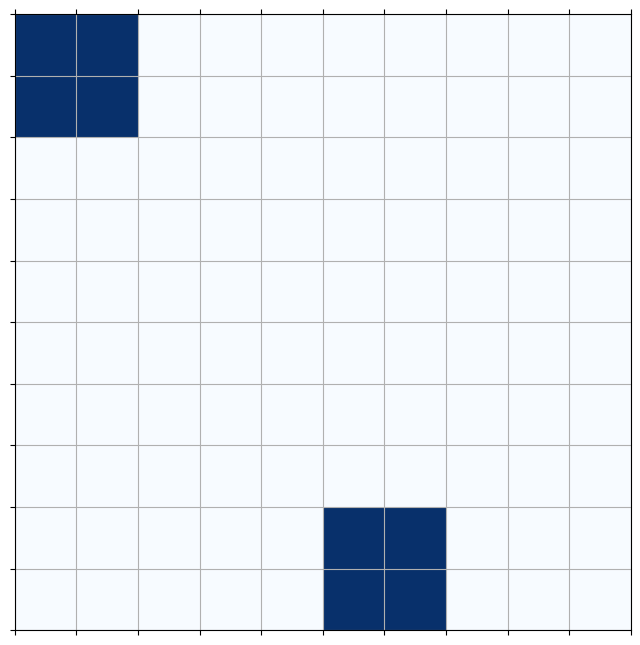

In [ ]:
num_neigh=cell1+cell2+cell3+cell4+cell5+cell6+cell7+cell8
old_cell=cells.copy()
# four rules
cells[num_neigh<2]=0
cells[num_neigh>3]=0
cells[np.logical_and(np.logical_or(num_neigh==2,num_neigh==3),old_cell==1)]=1
cells[np.logical_and(num_neigh==3, old_cell==0)]=1
# draw
h.set_data(cells)
ax.set_xticks(np.arange(-.5, dim, 1));
ax.set_yticks(np.arange(-.5, dim, 1));
fig

## Pool Table
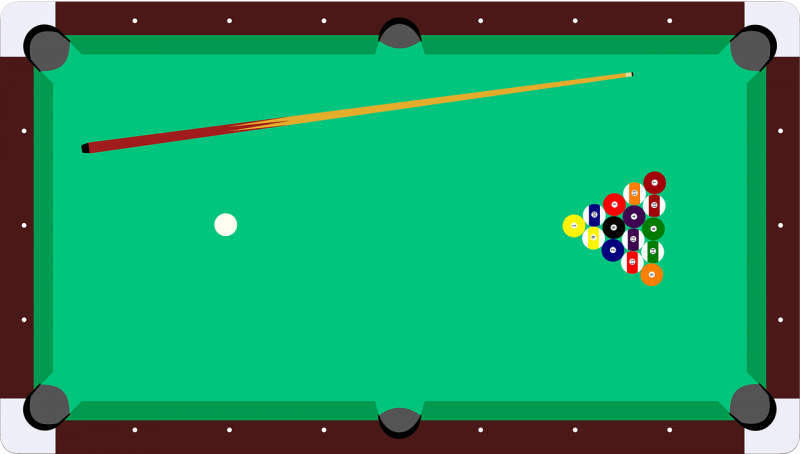

### functions & class

In [ ]:
class Ball(object):
    '''a ball
    '''
    def __init__(self,r,v,m,radius): #initialize the object, including the radius
        self.r=r
        self.v=v
        self.m=m
        self.radius = radius
        self.path={'x':[r [0]],'y':[r[1]]} #self.path is a dictionry, containing two keys 'x', 'y', the value of each key is a list
        self.graph=plt.Circle((self.path['x'][0], self.path['y'][0]),radius=self.radius,zorder=2)
        #r,v,m,path are attributes of ball
    def record(self):
        self.path['x'].append(self.r[0]) #append the current x position to path
        self.path['y'].append(self.r[1]) #append the current y position to path
    def draw(self,ax):
        ax.add_patch(self.graph)
    def update_position(self,indx):
        self.graph.center=self.path['x'][indx], self.path['y'][indx]
    def undraw(self):
        self.graph.remove()


def trajectory(frame_indx,ball,factor):
    indx = factor*frame_indx
    for i_ball in range(len(ball)):
        ball[i_ball].update_position(indx)

In [ ]:
def motion_billiard(dt, num_step, ball, length, width, t=0):
    def boundary(ball):
        '''checking if the ball is within the boundary
        '''
        if ball.r[0]-ball.radius<0 or ball.r[0] + ball.radius>length:
            ball.v[0]=-ball.v[0]
        if ball.r[1]-ball.radius<0 or ball.r[1] + ball.radius>width:
            ball.v[1]=-ball.v[1]
        return ball
    time_list=[t]
    num_ball = len(ball)
    #starting iteration
    for i_step in range(num_step):
        for i_ball in range(num_ball):
            for j_ball in range(i_ball+1,num_ball):
                dr_vec = ball[i_ball].r - ball[j_ball].r
                dr_nrm = np.linalg.norm(dr_vec)
                if dr_nrm <= ball[i_ball].radius + ball[j_ball].radius: #collision
                    n_hat = dr_vec/dr_nrm
                    #decompose vi
                    vi_n = np.dot(ball[i_ball].v, n_hat)*n_hat #(v.n_hat)*n_hat
                    vi_t = ball[i_ball].v - vi_n  #v=v_n + v_t
                    #decompose vj
                    vj_n = np.dot(ball[j_ball].v, n_hat)*n_hat
                    vj_t = ball[j_ball].v - vj_n  #v=v_n + v_t
                    m_i = ball[i_ball].m
                    m_j = ball[j_ball].m
                    v_center= (vi_n*m_i + vj_n*m_j)/(m_i+m_j) #velocity of the center of mass
                    vi_n_new = 2*v_center-vi_n  #normal velocities after collision
                    vj_n_new = 2*v_center-vj_n

                    ball[i_ball].v = vi_t + vi_n_new
                    ball[j_ball].v = vj_t + vj_n_new

        ##check boundary
        for i_ball in range(num_ball):
            ball[i_ball] = boundary(ball[i_ball])

       ##update position
        t=t+dt
        time_list.append(t)
        for i_ball in range(num_ball):
            ball[i_ball].r += ball[i_ball].v*dt
            ball[i_ball].record()
    #Visualization
    fig, ax = plt.subplots(figsize=(8,8*width/length))
    ax.plot([0,0],[0,width],'g')
    ax.plot([length,length],[0,width],'g')
    ax.plot([0,length],[0,0],'g')
    ax.plot([0,length],[width,width],'g')
    ax.axis('equal')
    ax.axis('off');
    for i_ball in range(num_ball):
        ball[i_ball].draw(ax)
    plt.close()
    num_frame = int(len(ball[0].path['x'])/100) # the total number of frames
    anim = animation.FuncAnimation(fig, lambda x: trajectory(x,ball,100), frames=num_frame, interval=40)
    return anim


### run

In [ ]:
ball1 = Ball(r=np.array([5.0,6.0]), v=np.array([-1,1.0]), radius=2, m=1.0)
ball2 = Ball(r=np.array([8.0,2.0]), v=np.array([-1,3.1]), radius=1, m=1.0)
ball3 = Ball(r=np.array([14.0,8.0]), v=np.array([-1,3.1]), radius=1, m=1.0)
anim = motion_billiard(dt=0.001, num_step=20000, ball=[ball1,ball2,ball3], length=20, width=10)
HTML(anim.to_html5_video())